# Анализ бронирований отелей

**Цель:** проанализировать датасет, используя полученные теоретические навыки. 

**Основные задачи:**

1. Необходимо получить информацию о датасете, посмотреть на распределение каждого из параметра. 
2. Проанализировать гостей отелей, которые не отказались от бронирования. 
3. При необходимости необходимо обработать пропуски и выбросы, выделить важные признаки для анализа. 
4. Необходимо проследить разные пары зависимостей между месяцем, типом номера, типом питания и количеством бронирования. Определить сколько в среднем платит посетитель каждого из отелей в зависимости от вида номера. 
5. Изучить из каких стран чаще всего бронируют номера в каждом из отелей

`Датасет был найден на просторах kaggle https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand`

## Описание датасета
- hotel - Название отеля
- is_canceled - Была ли отменена бронь
- lead_time - время до заселения
- arrival_date_year - год прибытия
- arrival_date_month - месяц прибытия
- arrival_date_week_number -неделя прибытия
- arrival_date_day_of_month - день прибытия
- stays_in_weekend_nights - количество дней в выходные
- stays_in_week_nights - количество дней в будние дни
- adults - кол-во взрослых
- children - кол-во детей
- babies - кол-во малышей
- meal - тип питания               
- country - страна
- market_segment - рыночный сегмент   
- distribution_channel - канал дистрибуции
- is_repeated_guest - постоянный клиент/нет
- previous_cancellations- - наличие прошлых отмен
- previous_bookings_not_canceled - количество неотмененных прошлых бронирований
- reserved_room_type - тип номера
- assigned_room_type - тип номера
- booking_changes - количество изменений в бронирований
- deposit_type - вид депозита
- agent - агент
- company - компания
- days_in_waiting_list - количество дней в ожидании
- customer_type - тип посетителя
- adr - Average Daily Rate - среднесуточная стоимость проживания
- required_car_parking_spaces - необходима ли парковка
- total_of_special_requests - кол-во "специальных" просьб
- reservation_status - статус брони
- reservation_status_date - дата 

## Импорт, скачивание датасета и получение первичной информации

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [38]:
hotels_data = pd.read_csv("hotel_bookings.csv")
hotels_data = hotels_data[hotels_data['is_canceled'] == 0].reset_index(drop=True)

In [39]:
size_initial = len(hotels_data)
print('Размер датафрейма:', hotels_data.shape)
hotels_data.head()

Размер датафрейма: (75166, 32)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [40]:
hotels_data.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
75161,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
75162,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
75163,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
75164,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
75165,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [41]:
hotels_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75166 entries, 0 to 75165
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           75166 non-null  object 
 1   is_canceled                     75166 non-null  int64  
 2   lead_time                       75166 non-null  int64  
 3   arrival_date_year               75166 non-null  int64  
 4   arrival_date_month              75166 non-null  object 
 5   arrival_date_week_number        75166 non-null  int64  
 6   arrival_date_day_of_month       75166 non-null  int64  
 7   stays_in_weekend_nights         75166 non-null  int64  
 8   stays_in_week_nights            75166 non-null  int64  
 9   adults                          75166 non-null  int64  
 10  children                        75166 non-null  float64
 11  babies                          75166 non-null  int64  
 12  meal                            

In [42]:
print('Количество пропущенных значений в столбцах')
hotels_data.isnull().sum()

Количество пропущенных значений в столбцах


hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              0
babies                                0
meal                                  0
country                             421
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12310
company                           69560


In [43]:
print('Количество дубликатов:', hotels_data.duplicated().sum())

Количество дубликатов: 11795


1. Видим, что данные по отелям распределены неравномерно, больше гостей бронируют Resort Hotel. 
1. Столбец компания содержит почти 96% пустых значений. Он не так важен для анализа данных, поэтому принято решение его удалить. 

2. В столбце adult минимальное значение 0, что довольно странно. Отель может забронировать взрослый человек, поэтому такие строки тоже удалим. 

3. Пустые значения в столбце children заменим нулями. А пустые значения в столбце country удалим. Мы могли бы заменить их каким-либо значением, например, наиболее часто встречающимся, но это было бы искажением данных. 
4. Датасет также необходимо очистить от дубликатов

## Обработка и анализ данных

<AxesSubplot:>

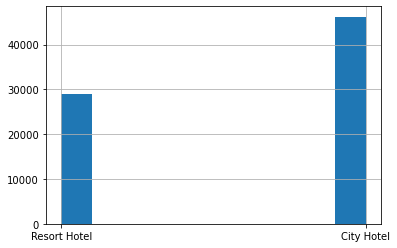

In [44]:
hotels_data['hotel'].hist()

In [45]:
hotels_data.drop(['company', 'agent'], axis=1, inplace=True)
hotels_data['children'].fillna(0, inplace=True)
hotels_data = hotels_data[hotels_data['country'].isna() == False]
hotels_data = hotels_data.drop_duplicates().reset_index(drop=True)

In [46]:
hotels_data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

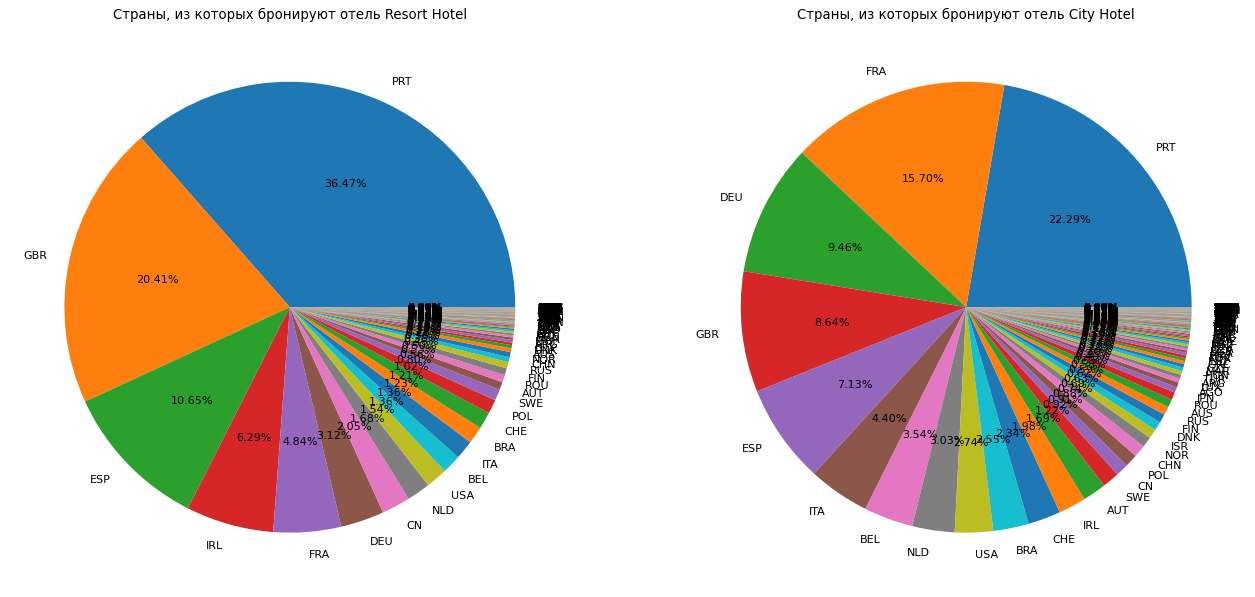

In [47]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 20), dpi=80)
ax1.pie(hotels_data[hotels_data['hotel'] == 'Resort Hotel'].groupby('country')['is_canceled'].count().sort_values(ascending=False), 
        labels=hotels_data[hotels_data['hotel'] == 'Resort Hotel'].groupby('country')['is_canceled'].count().sort_values(ascending=False).index, autopct= '%.2f%%')
ax1.set_title('Страны, из которых бронируют отель Resort Hotel')
ax2.pie(hotels_data[hotels_data['hotel'] == 'City Hotel'].groupby('country')['is_canceled'].count().sort_values(ascending=False), 
        labels=hotels_data[hotels_data['hotel'] == 'City Hotel'].groupby('country')['is_canceled'].count().sort_values(ascending=False).index,
        autopct= '%.2f%%')
ax2.set_title('Страны, из которых бронируют отель City Hotel')
plt.show()

Resort Hotel и City Hotel - это два отеля, расположенные в Португалии. Неудивительно, что больше всего бронирований пришлось именно на эту страну. Интересно, что City Hotel намного больше популярен у французов, когда как номера в Resort Hotel бронируют чаще гости из Великобритании. В целом, что вполне логично, большую часть гостей составляют жители Евросоюза. 

In [48]:
hotels_data['reservation_status'].unique()

array(['Check-Out'], dtype=object)

<AxesSubplot:title={'center':'Распределение типов бронирования для каждого из отелей'}, xlabel='hotel'>

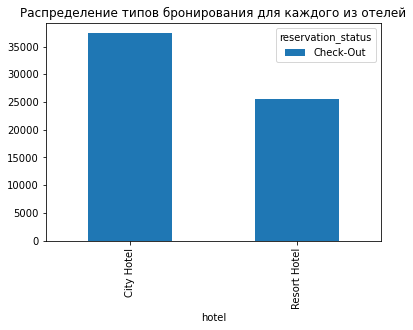

In [49]:
hotels_data.groupby('hotel')['reservation_status'].value_counts().unstack().plot(kind = 'bar', 
                                                                                 stacked = True,
                                                                                title='Распределение типов бронирования для каждого из отелей')
#Отмененные бронирования намеренно были удалены, график построен для проверки

In [50]:
#Посмотрим средний счет за ночь за человека в каждом из отелей:
hotels_data["adr"] = hotels_data["adr"].astype(int)
hotels_data["adr_per_night"] = (hotels_data["adr"] / (hotels_data["adults"] + hotels_data["children"])).astype(float)
hotels_data["total_quests"] = (hotels_data["adults"] + hotels_data["children"])

In [51]:
hotels_data[(hotels_data['hotel'] == 'City Hotel') & (hotels_data['is_canceled'] == 0)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37365 entries, 25566 to 62930
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           37365 non-null  object 
 1   is_canceled                     37365 non-null  int64  
 2   lead_time                       37365 non-null  int64  
 3   arrival_date_year               37365 non-null  int64  
 4   arrival_date_month              37365 non-null  object 
 5   arrival_date_week_number        37365 non-null  int64  
 6   arrival_date_day_of_month       37365 non-null  int64  
 7   stays_in_weekend_nights         37365 non-null  int64  
 8   stays_in_week_nights            37365 non-null  int64  
 9   adults                          37365 non-null  int64  
 10  children                        37365 non-null  float64
 11  babies                          37365 non-null  int64  
 12  meal                        

In [52]:
type(hotels_data[hotels_data['adr_per_night'].isna()]['adr'].unique()[0])

numpy.int32

In [53]:
hotels_data[(hotels_data['hotel'] == 'City Hotel') & 
                  (hotels_data['is_canceled'] == 0) & 
                  (hotels_data['adr'] == 0.0)]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,adr_per_night,total_quests
25566,City Hotel,0,6,2015,July,27,1,0,2,1,...,No Deposit,0,Transient,0,0,0,Check-Out,2015-07-03,0.0,1.0
25590,City Hotel,0,0,2015,July,29,15,2,5,2,...,No Deposit,0,Transient,0,0,0,Check-Out,2015-07-22,0.0,2.0
25594,City Hotel,0,18,2015,July,29,18,1,1,1,...,No Deposit,0,Transient-Party,0,0,0,Check-Out,2015-07-20,0.0,1.0
25599,City Hotel,0,12,2015,July,29,18,2,2,1,...,No Deposit,0,Transient-Party,0,0,0,Check-Out,2015-07-22,0.0,1.0
25608,City Hotel,0,20,2015,July,30,22,0,2,1,...,No Deposit,0,Transient-Party,0,0,0,Check-Out,2015-07-24,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62347,City Hotel,0,78,2017,August,34,23,0,0,1,...,No Deposit,0,Transient-Party,0,0,0,Check-Out,2017-08-23,0.0,1.0
62466,City Hotel,0,1,2017,August,34,24,0,1,2,...,No Deposit,0,Transient,0,0,3,Check-Out,2017-08-25,0.0,3.0
62608,City Hotel,0,1,2017,August,35,27,0,0,2,...,No Deposit,0,Transient,0,0,0,Check-Out,2017-08-27,0.0,2.0
62719,City Hotel,0,518,2017,August,34,26,2,1,1,...,No Deposit,0,Transient-Party,0,0,0,Check-Out,2017-08-29,0.0,1.0


Text(0, 0.5, 'Количество ночей')

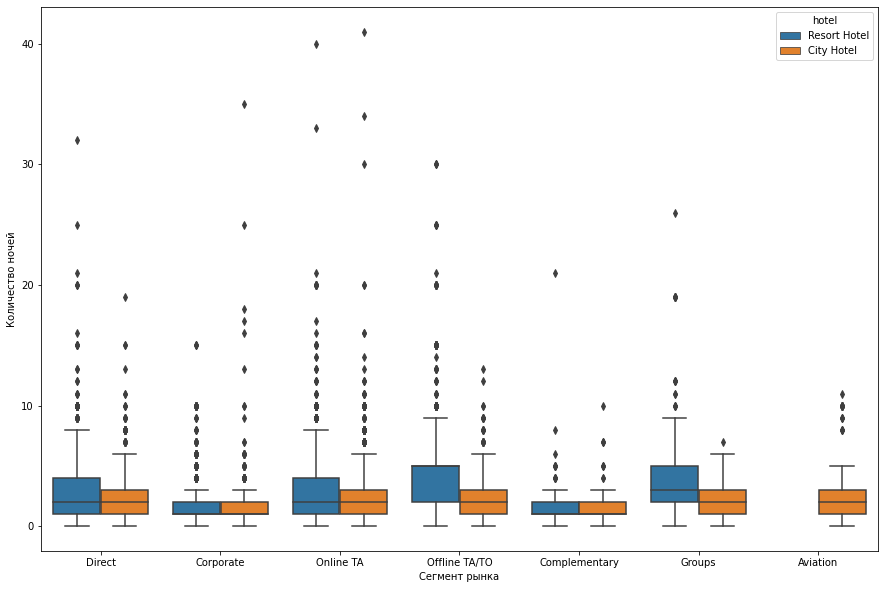

In [54]:
plt.figure(figsize = (15,10))
sns.boxplot(x="market_segment", y="stays_in_week_nights", data=hotels_data, hue="hotel")
plt.xlabel("Сегмент рынка", 
            size=10)
plt.ylabel("Количество ночей", 
           size=10)


In [55]:
month_dict = {'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12,
       'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6}
hotels_data['month_sort'] = hotels_data['arrival_date_month'].map(month_dict)

<AxesSubplot:xlabel='arrival_date_month', ylabel='Count'>

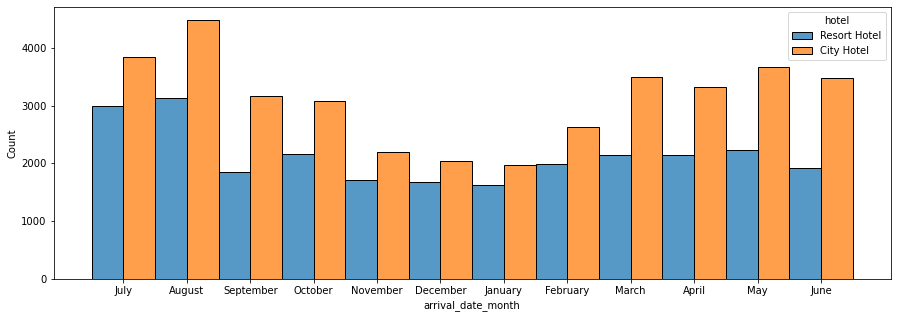

In [56]:
hotels_data = hotels_data.sort_values(['arrival_date_year', 'month_sort'])
plt.figure(figsize=(15, 5))
sns.histplot(x = "arrival_date_month", hue="hotel", multiple="dodge", data=hotels_data, hue_order=['Resort Hotel', 'City Hotel'])

In [57]:
city = hotels_data[hotels_data['hotel'] == 'City Hotel'].groupby(['arrival_date_month'])['adr'].mean().reset_index()
resort = hotels_data[hotels_data['hotel'] == 'Resort Hotel'].groupby(['arrival_date_month'])['adr'].mean().reset_index()
city['month_sort'] = city['arrival_date_month'].map(month_dict)
resort['month_sort'] = resort['arrival_date_month'].map(month_dict)

In [58]:
resort.sort_values('month_sort')

,arrival_date_month,adr,month_sort
4,January,48.697489,1
3,February,53.865799,2
7,March,57.350164,3
0,April,77.004212,4
8,May,77.587287,5
6,June,108.865866,6
5,July,151.007370,7
1,August,182.010856,8
11,September,98.464865,9
10,October,62.575058,10


In [59]:
city.sort_values('month_sort')

,arrival_date_month,adr,month_sort
4,January,82.948627,1
3,February,87.639787,2
7,March,90.509028,3
0,April,113.886719,4
8,May,124.313779,5
6,June,120.264351,6
5,July,119.455634,7
1,August,122.244588,8
11,September,116.498581,9
10,October,104.893866,10


<AxesSubplot:xlabel='arrival_date_year', ylabel='count'>

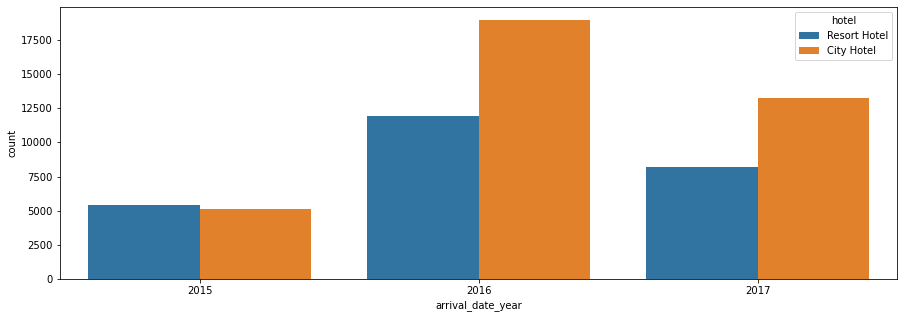

In [60]:
hotels_data = hotels_data.sort_values(['arrival_date_year'])
plt.figure(figsize=(15, 5))
sns.countplot(x = "arrival_date_year", hue="hotel",  data=hotels_data, hue_order=['Resort Hotel', 'City Hotel'])

2016 год был самым популярным для брониваний годом. Возможно, это связано с какими-то значимыми событиями в Португалии.

Заметно выделяется рост числа бронирований в теплые месяцы, пик приходится на на август. Можно предположить, что в большинстве своем этот рост обеспечен наплывом туристов в теплые месяцы года. Тенденция для двух отелей схожа. При этом в City Hotel самым дорогим месяцем является август, а в Resort - май. 

In [61]:
import numpy as np
print('Средний счет за человека за ночь в отеле City Hotel:', 
round(hotels_data[(hotels_data['hotel'] == 'City Hotel')]['adr'].sum() / 
(hotels_data[(hotels_data['hotel'] == 'City Hotel')]['total_quests'].sum()), 2))
print('Средний счет за человека за ночь в отеле Resort Hotel:', 
round(hotels_data[(hotels_data['hotel'] == 'Resort Hotel')]['adr'].sum() / 
(hotels_data[(hotels_data['hotel'] == 'Resort Hotel')]['total_quests'].sum() ), 2))

Средний счет за человека за ночь в отеле City Hotel: 54.91
Средний счет за человека за ночь в отеле Resort Hotel: 47.4


In [62]:
pd.pivot_table(hotels_data, index=['hotel', 'deposit_type'], values='adr', aggfunc='count')

adr
hotel        deposit_type       
City Hotel   No Deposit    37336
             Non Refund       24
             Refundable        5
Resort Hotel No Deposit    25459
             Non Refund       31
             Refundable       76

In [63]:
hotels_data[(hotels_data['hotel'] == 'Resort Hotel')]['deposit_type'].value_counts().to_frame()

,deposit_type
No Deposit,25459
Refundable,76
Non Refund,31


Средний счет за человека в City Hotel выше почти на 7 евро, чем Resort Hotel. Однако, как видно из гистограммы частот, бронирований city hotel имеет больше несмотря на более высокую стоимость. 

Распределение видов депозита примерно одинаковое в отелях. Совсем немного людей оставляют депозит в принципе, из них чаще оставлют невозвратный. Возможно это связано с какими-либо правилами отеля: при возможности возврата номер дороже.

In [64]:
hotels_data["total_nights"] = hotels_data["stays_in_weekend_nights"] + hotels_data["stays_in_week_nights"]

<AxesSubplot:xlabel='total_nights', ylabel='count'>

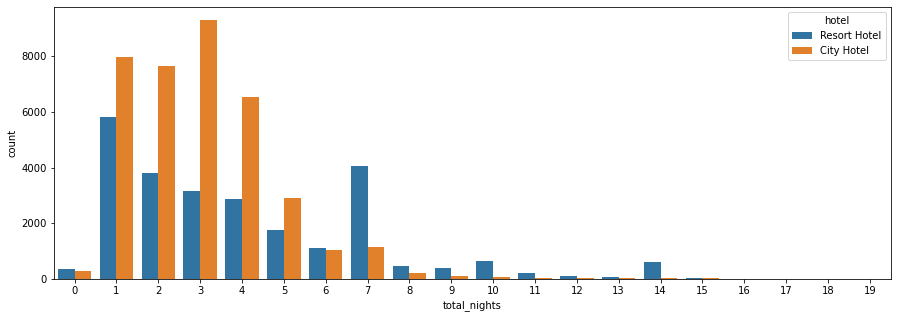

In [65]:
plt.figure(figsize=(15, 5))
sns.countplot(x = "total_nights", hue="hotel",  data=hotels_data[hotels_data['total_nights'] < 20], hue_order=['Resort Hotel', 'City Hotel'])

Данные намерено были сокращены: оставлены только те строки, где период пребывания меньше 20 дней. Так как больше - это единичные случаи и не исключает выбросов. 

Заметно, что в среднем гости едут на краткий срок - до недели, в City Hotel максимум приходится на 3 дня, а в Resort Hotel - на 1 или 7 дней. 

Выберем числовые признаки, чтобы проследить зависимость между ними

In [66]:
df = hotels_data[['lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 
        'days_in_waiting_list', 'adr', 'total_of_special_requests', 'previous_bookings_not_canceled']].corr()

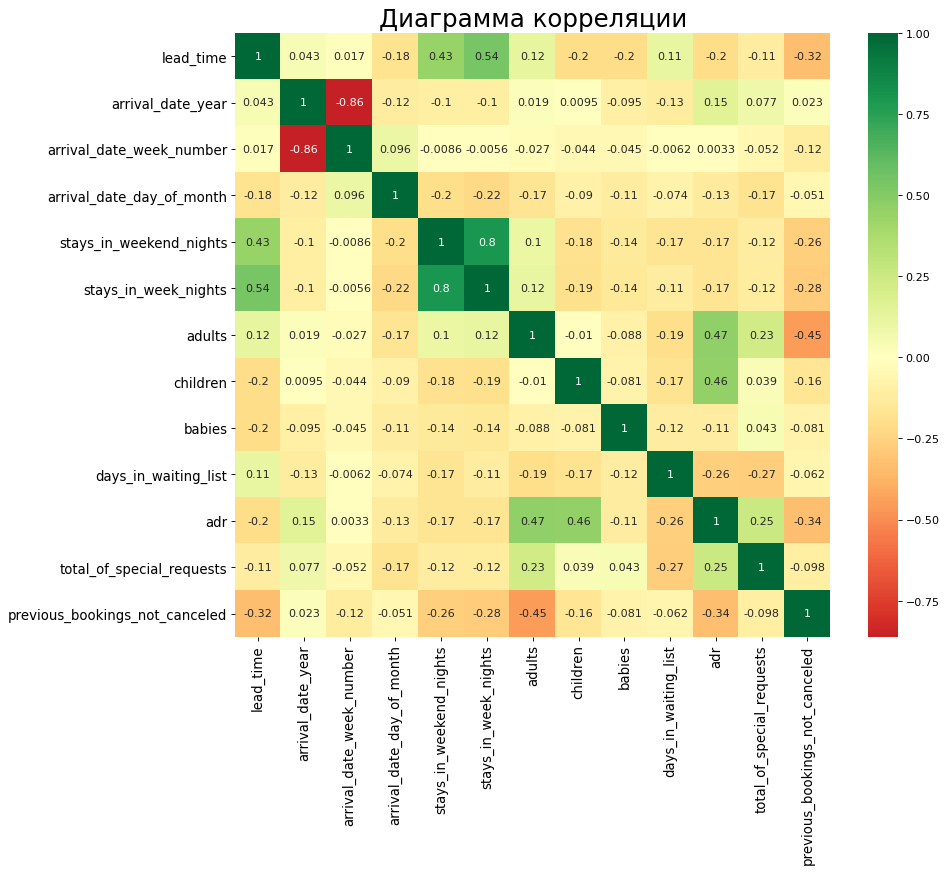

In [67]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Диаграмма корреляции', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

- Можно видеть что, при увеличении количества взрослых, а еще сильнее детей среднесуточная стоимость проживая увеличивается.

- Также видим положительную корреляцию между lead_time и количеством дней - чем больше гость бронирует дней, тем заранее он это делает. Ведь отпуск и поездки с семьей необходимо планировать заранее!

- Также виднеется отрицательно зависимость между lead_time и среднесуточной стоимости проживания. Можно предположить, что чем заранее гость забронировал отель, тем дешевле ему удалось это сделать. Ведь цены всегда выше, если бронировать "день в день".

- Также похожую тенденцию, но уже с отрицательной корреляцией, можно проследить у столбца previous_bookings_not_canceled. Чем меньше бронирований с заселением в прошлом, тем выше стоимость. Возможно это касается онлайнй дистрибуции, где система сама рассчитывает стоимость с использованием такой закономерности.

- Что касается количества специальных просьб, то можем видеть, что при их увеличении увеличивается и стоимость проживание. Также есть положительная корреляция с количеством взрослых. Больше взрослых - больше просьб! 

- Согласно диаграмме остальные признаки либо не имеют зависимости, либо она сильно незначительная и сложно утверждать о ее существовании.  


#### Где чаще всего совершено бронирование в каждом из отелей?

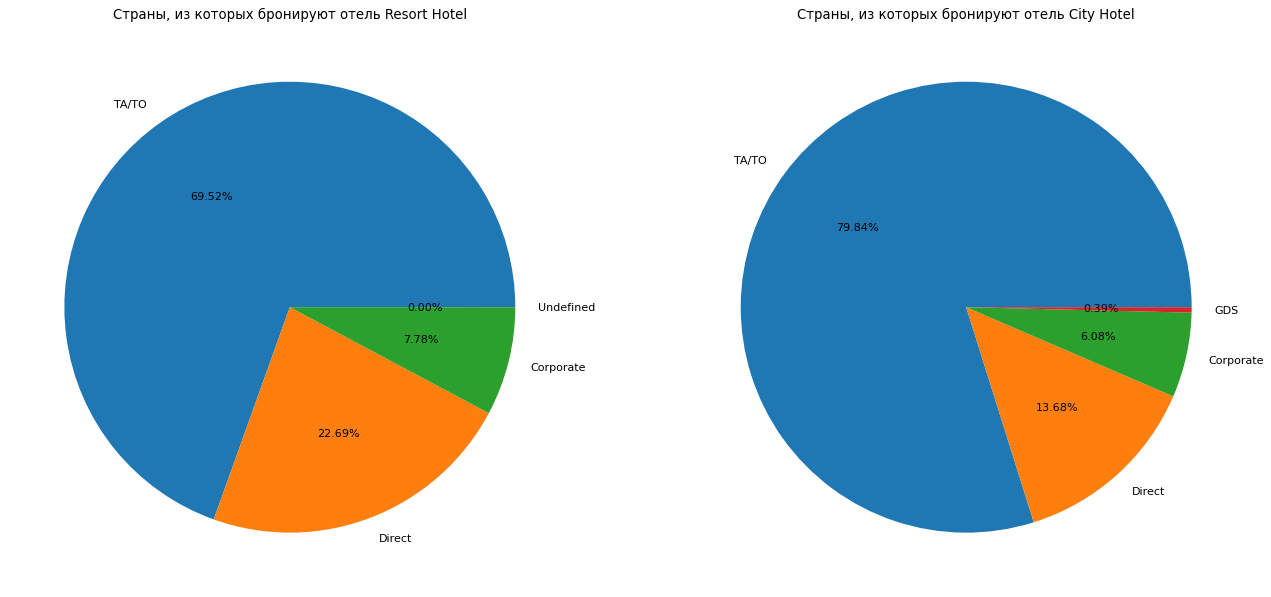

In [68]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 20), dpi=80)
ax1.pie(hotels_data[hotels_data['hotel'] == 'Resort Hotel'].groupby('distribution_channel')['is_canceled'].count().sort_values(ascending=False), 
        labels=hotels_data[hotels_data['hotel'] == 'Resort Hotel'].groupby('distribution_channel')['is_canceled'].count().sort_values(ascending=False).index, autopct= '%.2f%%')
ax1.set_title('Страны, из которых бронируют отель Resort Hotel')
ax2.pie(hotels_data[hotels_data['hotel'] == 'City Hotel'].groupby('distribution_channel')['is_canceled'].count().sort_values(ascending=False), 
        labels=hotels_data[hotels_data['hotel'] == 'City Hotel'].groupby('distribution_channel')['is_canceled'].count().sort_values(ascending=False).index,
        autopct= '%.2f%%')
ax2.set_title('Страны, из которых бронируют отель City Hotel')
plt.show()


<AxesSubplot:title={'center':'Какой отель наиболее часто выбирают в зависимости от сегмента?'}, xlabel='hotel'>

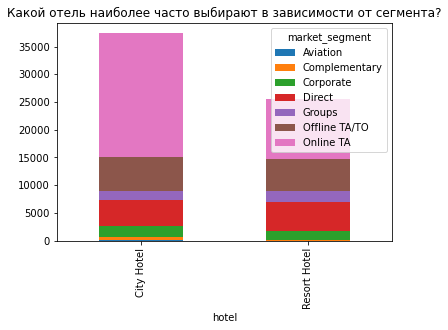

In [69]:
hotels_data.groupby('hotel')['market_segment'].value_counts().unstack().plot(kind = 'bar', 
                                                                                 stacked = True,
                                                                                title='Какой отель наиболее часто выбирают в зависимости от сегмента?')
#Отмененные бронирования намеренно были удалены, график построен для проверки

- Видим, что распределение примерно одинаковое. Как уже было сказано ранее, City Hotel более популярен для бронирований, а online Travel Agent является наиболее крупным рыночным сегментом.  
- А что касается канала дистрибуции, можно сказать, что resort hotel бронируют чуть более чаще напрямую нежели city hotel. Возможно это связано с хорошей политикой продвижения сайта/выгодными предложениями на сайте (если говорить об онлайн покупке) или же люди приезжают и бронируют отель уже на месте (тогда, можно предположить, что должно быть популярно краткосрочное пребывание - как помним из графика выше однодневные поездки самые популярные)

In [70]:
hotels_data['meal'].unique() #SC - это self catering, поэтому Undefined можно отнести к той же категории
hotels_data['meal'] = hotels_data['meal'].replace('Undefined', 'SC')

<AxesSubplot:>

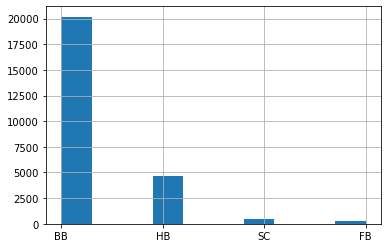

In [71]:
hotels_data[hotels_data['hotel'] == 'Resort Hotel']['meal'].hist()

<AxesSubplot:>

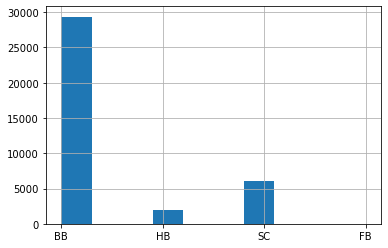

In [72]:
hotels_data[hotels_data['hotel'] == 'City Hotel']['meal'].hist()

В большинстве своем гости бронируют номер с завтраками, в resort hotel также популярен завтрак+ужин. А в city много гостей бронируют и вовсе без питания. Там плохие отзывы на еду или и без того слишком дорого?

### Вывод

*Были проанализированы два отеля, находящиеся в Португалии. В ходе данной работы оставили необходимые столбцы, обработали пропуски и удалили дубликаты. Оставили только те строки, где не произошло отмены, чтобы лучше узнать потенциального гостя каждого из отелей.*

***Можно сделать следующие выводы:***

- Большее количество гостей посещают отель Сity Hotel, возможно они как-то привлекают посетителей или же у них просто больше номеров. 
- 2016 год был пиковым для бронирований, а теплые месяцы являются самыми популярными длч поездок в Португалию, возможно потому что там сезон в это время
- Большую часть гостей для обоих отелей составляют гости из евросоюза, однако встречаются и выходцы из США, России и Бразилии. Неудивительно, что больше всего бронирований пришлось на Португалию. City Hotel больше популярен среди французов, а Resort Hotel бронируют чаще гости из Великобритании.
- Средний счет за человека за ночь в отеле City Hotel дороже почти на 7 евро чем в Resort Hotel
- В среднем гости едут на краткий срок - до недели, в City Hotel максимум приходится на 3 дня, а в Resort Hotel - на 1 или 7 дней. 
- В большинстве своем гости бронируют номер с завтраками, в resort hotel также популярен завтрак+ужин. А в city много гостей бронируют без питания
- Resort hotel бронируют чуть более чаще напрямую нежели City hotel. Также online Travel Agent является наиболее крупным рыночным сегментом


***Исходя из диаграммы кореляции можно сделать выводы, что среднесуточная стоимость уменьшается при следующих изменениях:***
   - Чем заранее забронирован номер
   - чем больше дней забронировано
   - чем меньше гостей отдыхают
   - чем больше дополнительных просьб запрошено
   - чем меньше отмен бронирований было совершено в прошлом
